# Занятие 12

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## Оценка распределений

### Дискретное

In [2]:
N = 100
sample = np.random.choice([1,2,3,4,5,6], N)
sample

array([3, 3, 5, 1, 2, 1, 3, 3, 3, 3, 2, 2, 5, 4, 2, 2, 4, 4, 2, 3, 5, 6,
       5, 6, 5, 6, 2, 4, 5, 4, 2, 2, 3, 3, 1, 5, 2, 1, 3, 2, 6, 1, 4, 2,
       6, 3, 4, 5, 1, 4, 4, 1, 6, 2, 5, 4, 3, 2, 3, 5, 2, 3, 1, 3, 2, 6,
       3, 1, 2, 4, 6, 3, 6, 1, 1, 4, 1, 5, 3, 4, 6, 2, 5, 4, 1, 6, 2, 5,
       2, 1, 1, 2, 3, 4, 6, 6, 4, 4, 3, 1])

In [3]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)

print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[16 21 20 17 13 13]
[0.16 0.21 0.2  0.17 0.13 0.13]
[1 2 3 4 5 6]
1.0


In [4]:
for N in [10, 100, 1000, 10000, 100000]:
    sample = np.random.choice([1,2,3,4,5,6], N)
    unique_value, counts = np.unique(sample, return_counts=True)
    print(unique_value)
    print("{}: {} {}".format(N, counts/N, np.sum(counts/N)))

[1 2 3 4 5]
10: [0.1 0.1 0.2 0.3 0.3] 1.0
[1 2 3 4 5 6]
100: [0.14 0.15 0.21 0.21 0.16 0.13] 1.0
[1 2 3 4 5 6]
1000: [0.166 0.171 0.168 0.178 0.153 0.164] 1.0
[1 2 3 4 5 6]
10000: [0.1737 0.1657 0.1669 0.1608 0.1714 0.1615] 1.0
[1 2 3 4 5 6]
100000: [0.16716 0.16536 0.16775 0.16594 0.16613 0.16766] 1.0


In [5]:
1/6

0.16666666666666666

### Непрерывное

In [6]:
# возьмём выборку из нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(10)
#sample

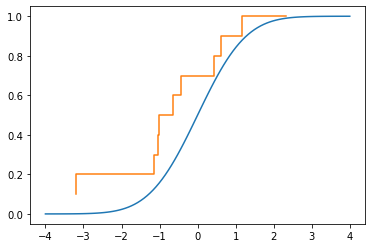

In [7]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Воспользуемся библиотекой для оценки (спасибо питон!)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')


[1. 0. 0. 3. 1. 1. 2. 1. 0. 1.]


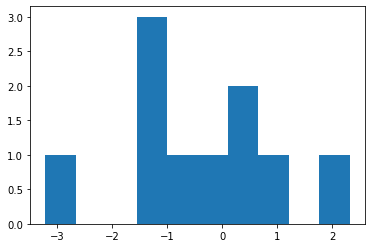

In [8]:
# теперь посмотрим на функцию плотности
b, n, _ = plt.hist(sample, )
print(b)

In [9]:
len(n)

11

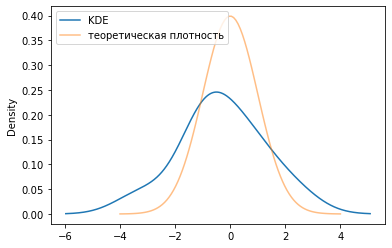

In [10]:
# ядерное сглаживание
# можно сделать в pandas
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# строим теоретическую плотность
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

### Предсказательный интервал
Имеем $X \sim N(\mu, \sigma^2)$. Согласно правилу [2-х сигм](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D1%82%D1%80%D1%91%D1%85_%D1%81%D0%B8%D0%B3%D0%BC) имеем $$\mathbf{P}(\mu - 2 \sigma \leq X \leq \mu + 2 \sigma) \approx 0.95$$



Если мы применим данное правило к стандартному нормальному распределению $X \sim N(0,1)$, то получим
$$\mathbf{P}(0 - 2 \cdot 1 \leq X \leq 0 + 2 \cdot 1) \approx 0.95$$

Проиллюстрируем это визуально

In [11]:
# возьмём выборку из стандартного нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([-1.90251127e-01, -1.77361805e+00, -2.24142301e-01,  7.17958613e-01,
        6.60575213e-01, -2.07027047e-01, -9.27848638e-02, -6.46157827e-01,
        1.10895721e+00, -2.27827702e+00, -4.53812461e-01, -1.03741104e+00,
        1.95611516e+00, -2.74900951e-01, -9.88347093e-01, -6.61783184e-01,
        4.50379866e-01, -3.59052743e-01,  5.99945086e-01,  3.65886069e-01,
        1.15473869e+00, -2.47184001e-01,  2.96669788e-01, -9.50732712e-02,
       -1.30432696e+00, -1.57690485e+00,  9.36347985e-01, -7.82040526e-01,
       -8.07511395e-02, -1.07532986e+00, -4.54964399e-01,  8.60120958e-04,
       -2.50590102e-01, -1.98579319e-01, -1.37544052e+00,  7.25093089e-01,
        7.48479928e-01,  1.61271469e+00, -2.01140681e-01,  1.77596290e-01,
        5.52362391e-01,  2.96196793e-01, -1.25630692e-02, -7.03441496e-01,
        5.32899069e-01, -1.62752070e+00,  1.91339935e+00, -4.22081680e-02,
        2.54771068e+00, -2.15356540e-01, -7.06251086e-01, -1.57255382e+00,
        2.97211641e-02,  

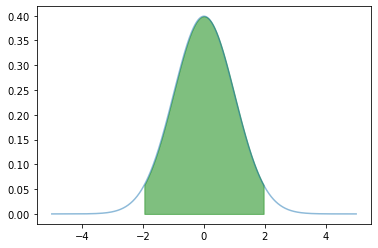

In [12]:
x = np.linspace(-5,5,1000000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
to_fill = np.linspace(-1.96, 1.96, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

In [13]:
norm_rv.pdf(-1.96)

0.058440944333451476

Оценка эта неточная, и не всегда нам нужно именно 0.95 вероятностной массы. 

В общем случае работают с квантилями

In [14]:
norm_rv.ppf(0.5)

0.0

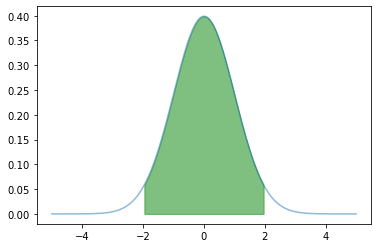

In [15]:
alpha = 0.05
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
q_a = norm_rv.ppf(alpha/2)
q_b = norm_rv.ppf(1-alpha/2)
to_fill = np.linspace(q_a, q_b, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

Теперь, если мы хотим найти такой интервал в котором с вероятностью 95% окажется реализация нашей случайной величины, нам лишь нужно найти соответствующие квантили $X_{\frac{\alpha}{2}}$ и $X_{1-\frac{\alpha}{2}}$.

Такой интервал можем найти для произвольно распределенной случайной величины

В частности, для нормально распределенной случайной величины
$$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \sigma \leq X \leq \mu + \zeta_{1-\frac{\alpha}{2}} \sigma) = 1-\alpha$$

$\zeta_{\alpha}$ будем обозначать квантиль порядка $\alpha$ стандартного нормального распределения (то-есть распределения $N(0,1)$). Тут мы воспользовались тем, что $\zeta_{\frac{\alpha}{2}} = - \zeta_{1-\frac{\alpha}{2}}$

$ \zeta_{0.975} \approx 1.95996 \approx 2$



**Предсказательный интервал оценивает диапазон значений**

### Доверительный интервал
Точечные оценки параметров это уже что-то, но также представляет интерес и то, в каком диапазоне изменяются оцениваемые параметры, например, средние значения.

Отвечают на вопрос **в каком диапазоне скорее всего лежит оцениваемый параметр**



Например, снова возьмем выборку из нормального распределения $X^n = (X_1, \dotso, X_n),\ X \sim \mathbf{N}(\mu, \sigma^2)$

Пусть нам известна дисперсия, т.е $\sigma^2$. Тогда по [свойствам](http://www.machinelearning.ru/wiki/index.php?title=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) нормального распределения получаем $\sum_{i=1}^{n} X_i \sim \mathbf{N}(n\mu, n\sigma^2) \rightarrow \frac{\sum_{i=1}^{n} X_i}{n} = \overline{X_n} \sim \mathbf{N}(\mu, \frac{\sigma^2}{n})$

По формуле для предсказательного интервала получаем $$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \overline{X_n} \leq \mu + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Теперь, переносим $\overline{X_n}$ и $\mu$ в неравенствах, и получаем доверительный интервал для $\mu$

$$\mathbf{P}(\overline{X_n} - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X_n} + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

In [16]:
# Задание, 
# 1) сгенерируйте 10, 50, 100 примеров из нормального распределения с произвольными мат ожиданием и дисперсией
# 2) Постройте по формуле интервал с alpha = 0.05
# ваш код тут
mu = 5
sigma = 7
norm_rv = sts.norm(mu, sigma)
N = [10, 50, 100, 100000]
alpha = .05
for n in N:
    samples = np.linspace(-1, 11, n)
    pdf = norm_rv.pdf(samples)
    qa = norm_rv.pdf(alpha/2)
    qb = norm_rv.pdf(1-alpha/2)
    print ("Для N=%.f ДИ %.4f ... %.4f" % (n, samples[np.argmax(pdf)]-qa*np.sqrt(sigma/n), samples[np.argmax(pdf)]+qb*np.sqrt(sigma/n)))

Для N=10 ДИ 4.2963 ... 4.3738
Для N=50 ДИ 4.8610 ... 4.8956
Для N=100 ДИ 4.9277 ... 4.9522
Для N=100000 ДИ 4.9996 ... 5.0003


Случай известной дисперсии как правило встречается для измерительных приборов, когда нам известная его погрешность.

Есть метод, позволяющий построить доверительный интервал и для такого случая. Разница будет лишь в том, что вместо выборочной дисперсии будет взята выборочная дисперсия, а вместо квантилей стандартного нормального распределения используют квантили распределения Стьюдента (согласно которой распределена так называемая t-статистика)

Но что делать, если распределение отлично от нормального или это доподлино неизвестно?


К счастью...


## Центральная предельная теорема

In [17]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([3.54241424, 2.34662635, 1.61103185, 1.46573418, 3.06823342,
       3.7952296 , 3.58633408, 3.21716882, 1.95324763, 3.08062095])

In [18]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(10000):
    means.append(np.mean(uniform_rv.rvs(N)))

(array([0.02843493, 0.01895662, 0.01895662, 0.06634817, 0.07582649,
        0.09478311, 0.11373973, 0.14217466, 0.17060959, 0.37913243,
        0.33174087, 0.56869864, 0.72982992, 0.72035161, 1.21322377,
        1.08052742, 1.33644181, 1.7724441 , 2.25583794, 2.43592584,
        2.61601375, 3.11836421, 3.2889738 , 3.86715076, 4.11358683,
        4.09463021, 4.28419642, 4.67280716, 4.72967703, 4.78654689,
        4.49271926, 4.51167588, 3.96193386, 4.00932542, 3.63019299,
        3.13732083, 2.79610165, 2.7487101 , 2.22740301, 1.84827058,
        1.65870437, 1.35539843, 1.22270208, 0.95730938, 0.93835276,
        0.59713357, 0.37913243, 0.29382763, 0.2653927 , 0.23695777,
        0.12321804, 0.11373973, 0.02843493, 0.04739155, 0.04739155,
        0.00947831, 0.00947831, 0.00947831]),
 array([2.19605515, 2.20660555, 2.21715595, 2.22770636, 2.23825676,
        2.24880716, 2.25935757, 2.26990797, 2.28045837, 2.29100878,
        2.30155918, 2.31210958, 2.32265999, 2.33321039, 2.34376079,
  

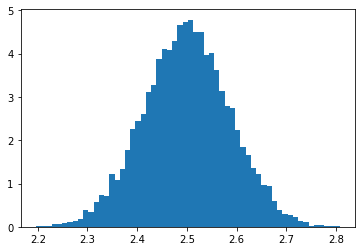

In [19]:
plt.hist(means, density=True, bins='auto')

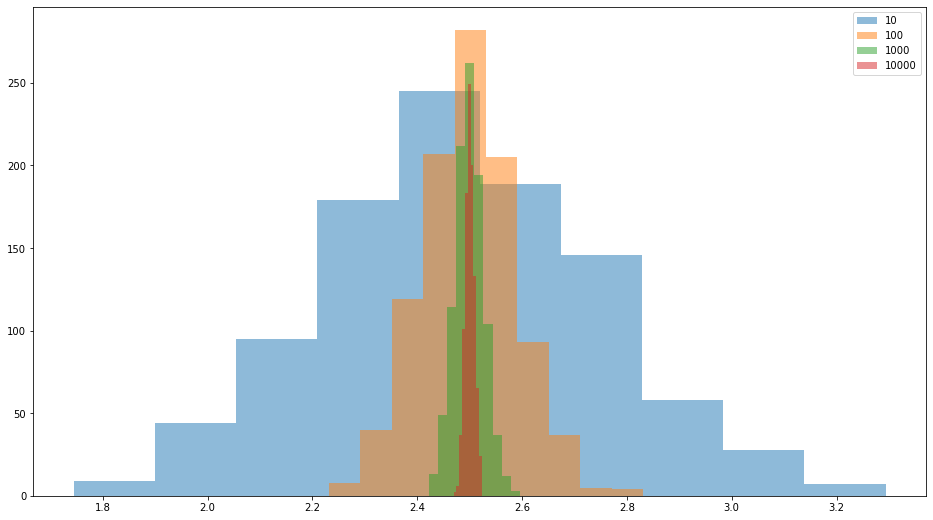

In [20]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(uniform_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [21]:
N = 30
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))

means = np.array(means).astype(np.float32)

In [22]:
uniform_rv.mean()

2.5

In [23]:
uniform_rv.var()

0.75

In [24]:
uniform_rv.std()

0.8660254037844386

[]

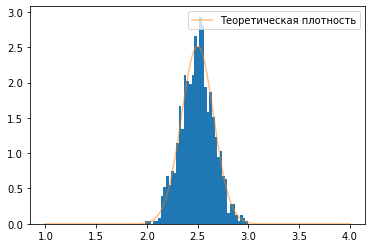

In [25]:
norm_rv = sts.norm(loc=uniform_rv.mean(), scale=uniform_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

In [26]:
data = uniform_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 2 * uniform_rv.std() / np.sqrt(N), np.mean(data) + 2 * uniform_rv.std() / np.sqrt(N) 
))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [2.003015284845737, 2.635470816879413] 
Доверительный интервал для среднего по цпт интервальная оценка: (2.016224029120197, 2.6222620726049533) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (2.266142758265225, 2.3723433434599253) 


#### То же и для дискретных, посмотрим на примере биномиального распределения

In [27]:
binomial_rv = sts.binom(20, 0.4)
binomial_rv.rvs(10)

# мат ожидание np = 20*0.4 = 8
# дисперсия npq = np(1-p) = 20*0.4*0.6 = 8 * 0.6 = 4.8

array([ 3,  8,  7,  8,  8, 10,  8,  6,  5,  9])

Text(0.5, 0, '$x$')

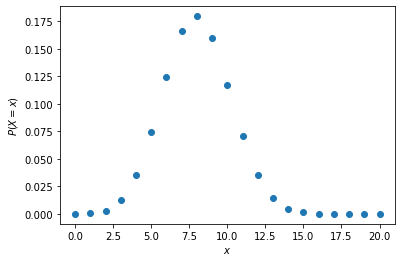

In [28]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

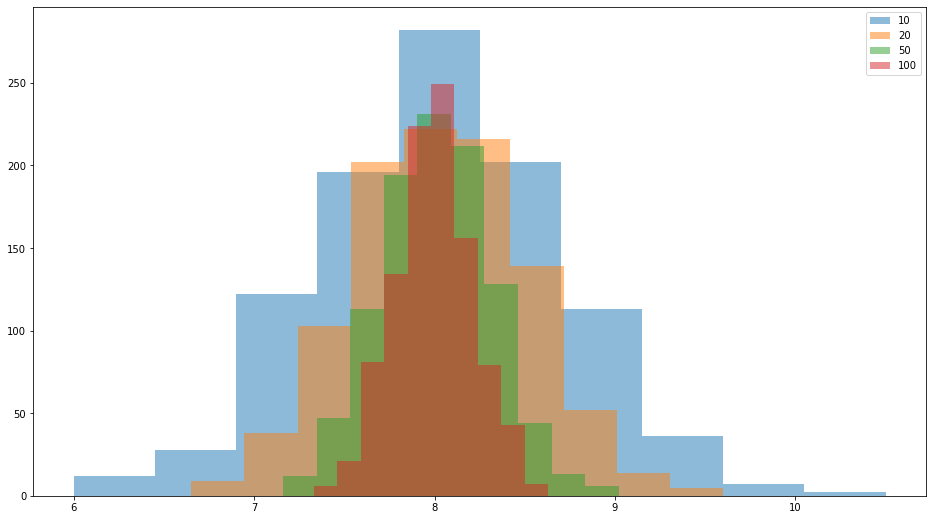

In [29]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
         means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '20', '50', '100'])
plt.show()

### Всегда ли ЦПТ хорошо работает?
Вообще в полной формулировке есть формальные требования, определяющие границы применимости данной теоремы. Но пока что, будем говорить, что применять ЦПТ можно, если кол-во примеров по крайней мере пара десятков (30-50), и само распределение случайно величины $X$ не является явно ассимметричным ("скошенным")

#### Попробуем уменьшить вероятность успеха в серии n независимых испытаний, тем самым, сделаем наше распределение успехов несколько более ассиметричным

In [30]:
binomial_rv = sts.binom(20, 0.01)
binomial_rv.rvs(10)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

Text(0.5, 0, '$x$')

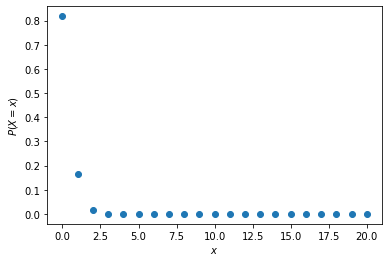

In [31]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

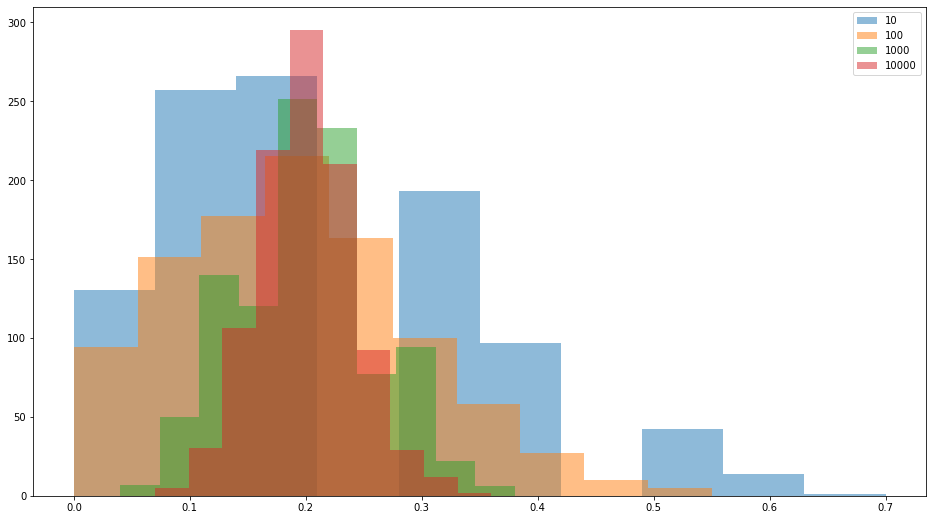

In [32]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
        means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()